<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch7_1~5_pg_409~451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 07 군집화**

---

##**01 K-평균 알고리즘 이해**

* K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘
* 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

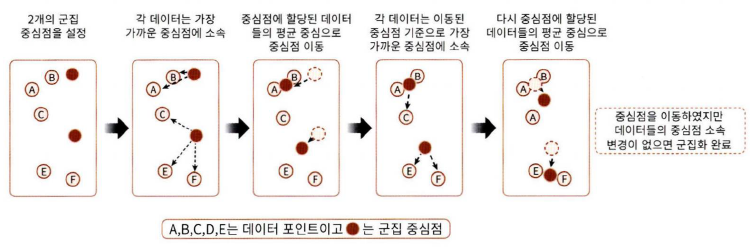

**장점:**
* 군집화에서 가장 많이 활용되는 알고리즘
* 알고리즘이 쉽고 간결

**단점:**
* 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐(PCA로 차원 감소 필요)
* 반복 횟수가 많을 경우 수행시간 매우 느려짐
* 몇 개의 군집(cluster)을 선택해야할지 명확하지 않음

### **사이킷런 KMeans 클래스 소개**

* 사이킷런 패키지는 KMeans 클래스 제공
* n_cluster 파라미터: 군집화할 개수(군집 중심점의 개수)
* init 파라미터: 초기에 군집 중심점의 좌표를 설정할 방식
* max_iter 파라미터: 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동 없으면 종료.

* 사이킷런의 비지도학습 클래스와 마찬가리조 fit() / fit_transform() 메서드로 수행.
* labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
* cluster_centers_: 각 군집 중심점 좌표(Shape는 [군집 개수, 피처개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 가능.

### **K-평균을 이용한 붓꽃 데이터 세트 군집화**

* 붓꽃 데이터: 붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이와 너비에 따른 품종을 분류하는 데이터 세트.

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
# 3개 그룹으로 군집화
# 초기 중심 설정 방식은 디폴트 값인 k-means++으로, mat_iter도 디폴트 값인 300으로 설정.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

* fit()을 수행해 irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환됨.

In [4]:
# kmeans의 labels_ 속성값 통해 각 데이터가 속해있는 중심 확인.
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


* 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화 효과 확인
* 붓꽃 데이터 세트의 target 값을 'target' 칼럼, labels_ 값을 'cluster' 칼럼으로 지정해 group by 연산 수행.

In [5]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


* Target 2 값 데이터가 분산되어 그루핑됨.

---

**시각화**
* PCA를 이용해 4개의 속성을 2개로 차원 축소(2차원 평면 상에서 표현하기 위해)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


* pca_x는 X 좌표 값, pca_y는 Y 좌표 값을 나타냄.

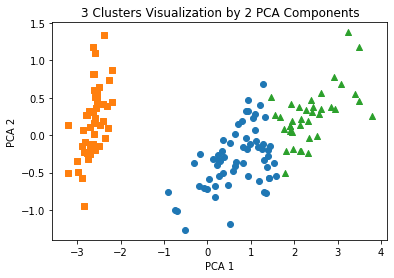

In [7]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

* Cluster 1에 해당하는 네모는 다른 군집과 명확히 분리됨
* Cluster 0과 2는 명확히 분리되지 않음.

### **군집화 알고리즘 테스트를 위한 데이터 생성**

* 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해보기 위한 간단한 데이터 생성기 제공함.
* 대표적 군집화용 데이터 생성기: make_blobs(), make_classification() API
* make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능 추가되어있음.

make_blobs()의 호출 파라미터:
* n_samples: 생성할 총 데이터의 개수. 디폴트는 100개
* n_features: 데이터의 피철 개수. 시각화 목적일 경우 보통 첫번째 피처는 x좌표, 두번째 피처는 y좌표상에 표현함.
* centers: int 값. 숫자로 설정시 군집의 개수, ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표 의미.
* cluster_std: 생성될 군집 데이터의 표준편차 의미. ndarray 형태일 경우 군집별로 서로 다른 표준편차를 가진 데이터 세트 만들 때 사용 가능.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [9]:
# 데이터 세트를 DataFrame으로 변경
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


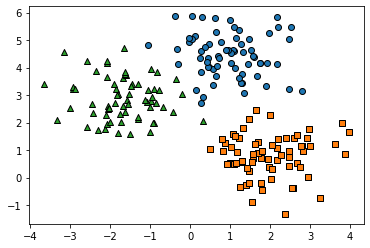

In [10]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target=0, target=1, target=2로 scatter plot을 marker별로 생성.
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

* KMeans 군집화 수행 후 군집별로 시각화하기

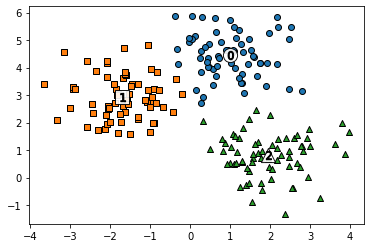

In [11]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

* make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 숫자로 매핑될 수 있음(그래서 산점도의 마커가 서로 다를 수 있음)(숫자에 의미없고 군집 구분 용도)

In [15]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


* 대부분 잘 매핑됨

---

* make_blobs()의 cluster_std 파라미터로 데이터 분포도 조절 가능
* cluster_std가 작을수록 군집 중심에 데이터가 모여있고 클수록 데이터가 퍼져있음.

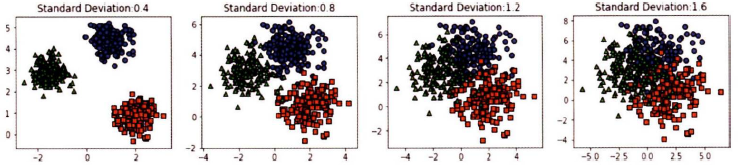

##**02 군집 평가(Cluster Evaluation)**

* 대부분의 군집화 데이터 세트는 정답 타깃 레이블이 없음.
* 군집화는 분류(Classification)와 유사해보이지만, 성격이 많이 다름
* 군집화가 효율적으로 잘 됐는지 평가할 수 있는 대표적인 지표: 실루엣 분석

### **실루엣 분석의 개요**

* 실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄.
* 효율적으로 잘 분리됐다는 건 다른 군집과는 거리가 떨어져있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있다는 뜻.
* 실루엣 계수(silhouette coefficient)를 기반으로 함
* 실루엣 계수: 개별 데이터가 가지는 군집화 지표.

* aij: i번째 데이터에서 자신이 속한 클러스터 내의 다르 ㄴ데이터 포인트까지의 거리. 즉, a12는 1번 데이터에서 2번 데이터까지의 거리
* a(i): i번째 데이터에서 자신이 속한 클러스터내의 다른 데이터 포인트들의 평균 거리. 즉, a(1) = 평균(a12, a13, a14)

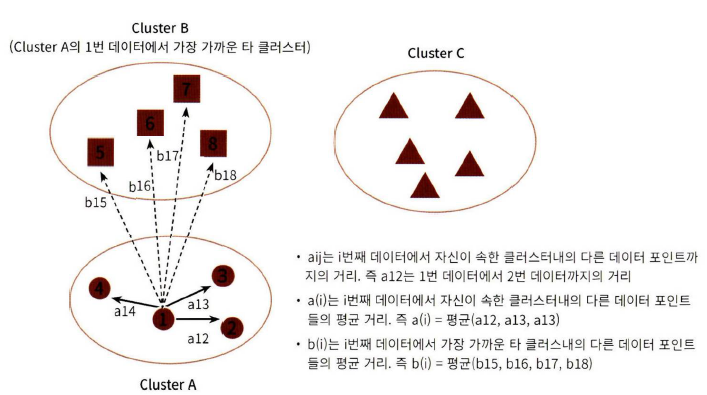

* 두 군집 간의 거리: b(i) - a(i)
* 이 값을 정규화하기 위해 MAX(a(i), b(i))로 나눔.

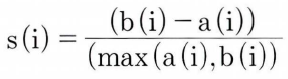

* 실루엣 계수는 -1에서 1 사이 값을 가짐
* 1에 가까울수록 근처의 군집이 멀리, 0에 가까울수록 근처의 군집과 가까워짐. -값일 경우 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻함.

---

사이킷런에서 실루엣 분석을 위해 제공하는 메서드:
* sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds): 각 데이터 포인트의 실루엣 계수 계산해 반환
* sklearn.metrics.silhouette_score(X,labels, metric='euclidean', sample_size=None, **Kwds): 전체 데이터의 실루엣 계수 값을 평균해 반환함.

---

좋은 군집화의 기준:
1. 전체 실루엣 계수의 평균값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야함. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요.

### **붓꽃 데이터 세트를 이용한 군집 평가**

In [17]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터의 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


* 평균 실루엣 계수 값이 0.553
* 1번 군집은 0.8 이상의 높은 실루엣 계수 값을 나타냄. = 다른 군집의 실루엣 계수 값이 평균보다 낮다

In [18]:
# 군집별 평균 실루엣 계수 값 확인
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

* 1번 군집에 비해 0,2번은 상대적으로 평균값이 낮음

### **군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

* 개별 군집별 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐있어야 K_평균의 적절한 군집 개수가 설정됐다고 판단 가능.

평균 실루엣 계수로 군집 개수를 최적화하는 방법.
1. **군집 개수가 2개일 경우**

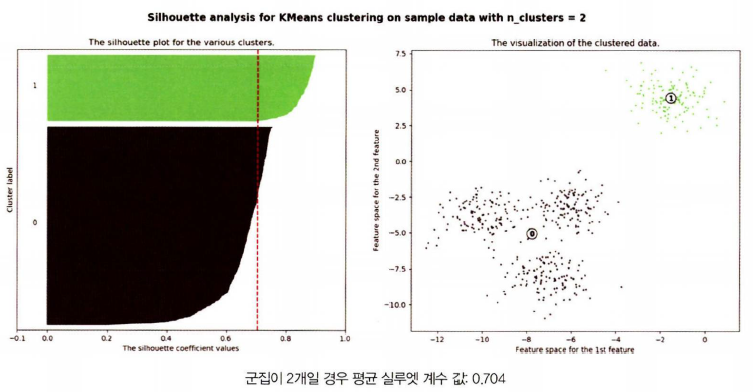

* X축: 실루엣 계수 값, Y축: 개별 군집과 이에 속하는 데이터, 점선: 평균 실루엣 계수 값.
* 1번 군집은 모든 데이터가 평균 실루엣 계수 값 이상이지만, 2번 군집은 평균보다 적은 데이터 값이 많음.

2. **군집 개수가 3개일 경우**

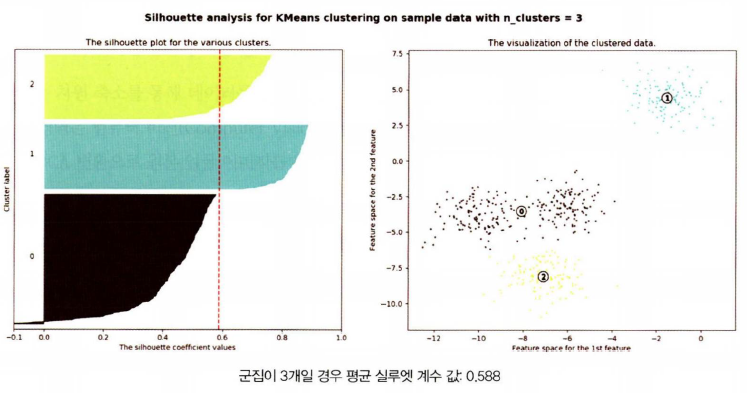

3. **군집 개수가 4개인 경우**

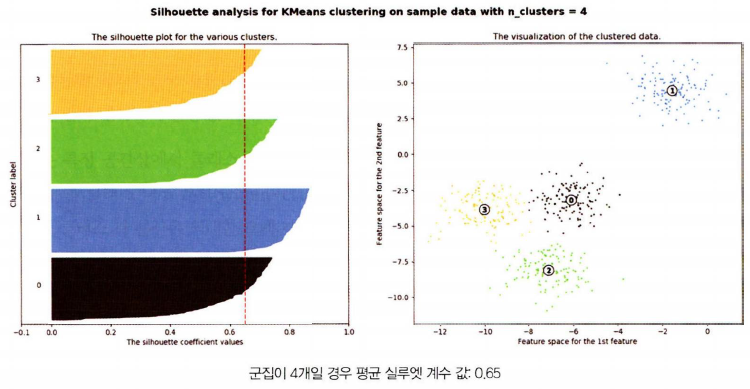

* 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치하고 있음
* 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 4개인 경우가 가장 이상적인 군집화 개수라고 판단할 수 있음.

**왼쪽 그림의 군집별 평균 실루엣 계수 값을 구하는 부분만 별도의 함수로 만들어 시각화해보기.**

* visualize_silhouette(): 여러 개의 군집 개수를 리스트로 가지는 첫번째 파라미터와 피처 데이터 세트으니 두번째 파라미터를 가지고 있음

In [21]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

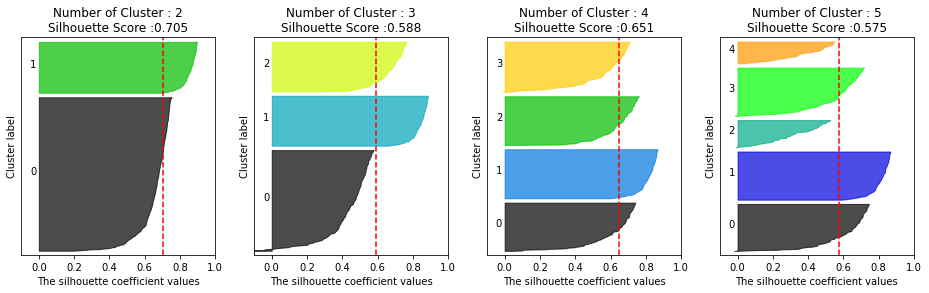

In [22]:
# mkae_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

* 앞과 마찬가지로 4개의 군집일 때 가장 최적임을 알 수 있음

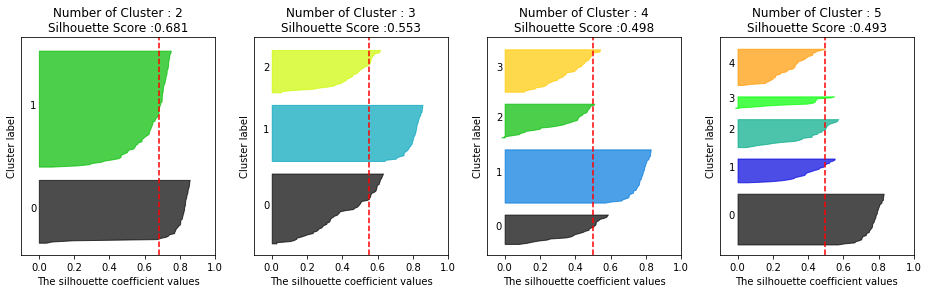

In [23]:
# 붓꽃 데이터의 K-평균 수행 시 최적의 군집 개수 확인
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

* 군집 2개가 가장 적당해보임.
* 실루엣 계수를 이용한 K-평균 군집 평가 방법은 직관적인 이해는 쉽지만 수행시간 크게 늘어남.

##**03 평균 이동**

### **평균 이동(Mean Shift)의 개요**

* 평균 이동(Mean Shift)는 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행
* 하지만 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 것이 아닌, 중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동시킴.
* 데이터의 분포도를 이용해 군집 중심점을 찾음. - 확률밀도함수(probability density function) 이용.
* 가장 집중적으로 데이터가 모여있어 확률밀도함수가 피크인 점을 군집 중심점으로 선정하며, 일반적으로 주어진 모델의 확률 밀도 함수는 KDE(Kernel Density Estimation)를 이용하여 찾음.

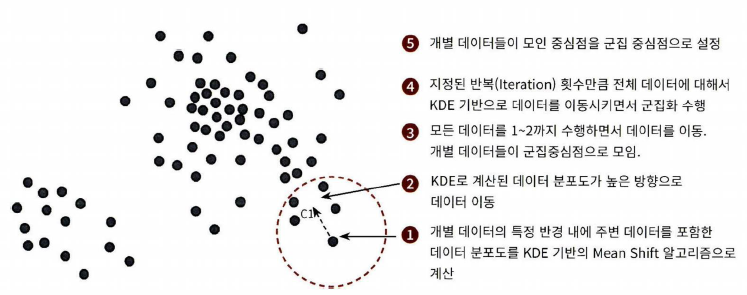

* KDE(Kernel Density Estimation)는 커널(Kernel) 함수를 통해 어떤 변수의 확률밀도함수를 추정하는 대표적인 방법.
* 관측한 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 수로 나눠 확률밀도함수 추정.
* 대표적인 커널 함수로는 가우시안 분포 함수 사용됨.
* 확률밀도함수 PDF는 확률변수의 분포를 나타내는 함수. 정규분포함수를 포함하여 감마분포, t-분포 등이 있음
* 확률밀도함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성, 확률분포 등 변수의 많은 요소 알 수 있음.

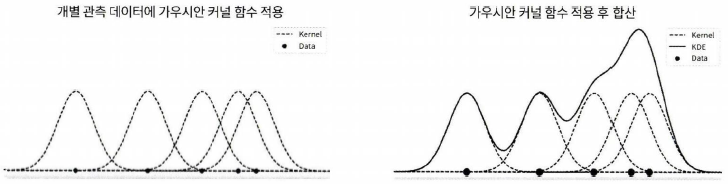

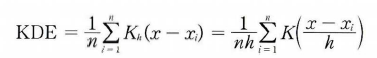

* K: 커널함수, x: 확률 변수값, xi: 관측값, h: 대역폭(bandwidth)
* 대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용됨.

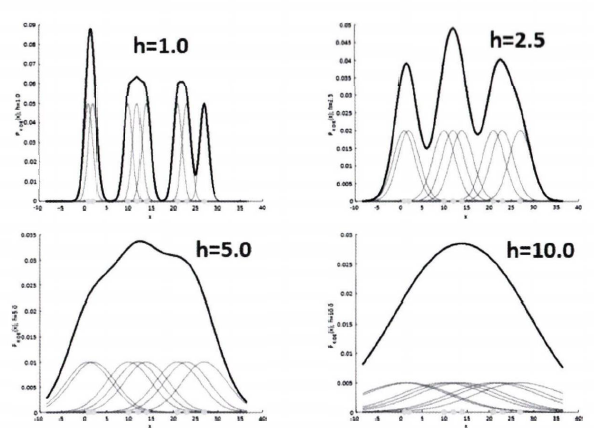

* 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가짐.
* 평균 이동 군집화는 군집의 개수를 정하지 않고 오직 대역폭의 크기에 따라 군집화 수행함.

In [24]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


* 군집이 0부터 5까지 6개로 분류됨.(지나치게 세분화됨)
* 일반적으로 bandwidth값을 작게 할수록 군집 개수가 많아짐.

In [26]:
# bandwidth를 살짝 높인 1.0으로 해서 MeanShift 수행
meanshift=MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


* 3개의 군집으로 잘 군집화됨.
* 이처럼 bandwidth 값이 군집화 개수에 큰 영향 미침.
* 최적화된 bandwidth 값은 estimate_bandwidth() 함수로 찾을 수 있음

In [27]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [28]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


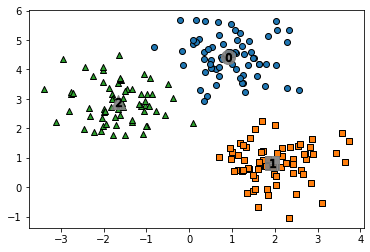

In [31]:
# 위에서 구성된 3개의 군집 시각화.
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [33]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


* 1:1로 잘 매칭됨.
* 알고리즘의 수행시간이 오래걸리고 bandwidth의 크기에 따른 군집화 영향도가 매우 큼.

## **04 GMM(Gaussian Mixture Model)**

* GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
* 가우시안 분포 = 정규분포.

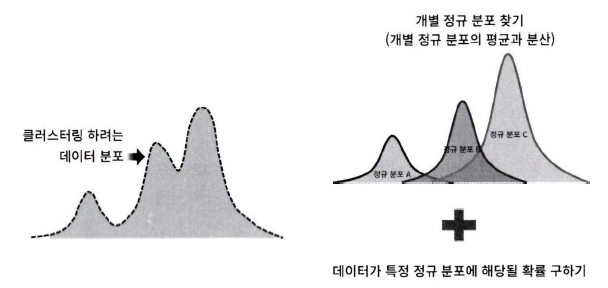

* 모수 추정 - 2가지를 추정
1. 개별 정규분포의 평균과 분산
2. 각 데이터가 어떤 정규분포에 해당되는지의 확률

### **GMM을 이용한 붓꽃 데이터 세트 군집화**

* GMM은 확률 기반 군집화, K-평균은 거리 기반 군집화.
* 양쪽 방식 비교해보기.

In [35]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns = feature_names)
irisDF['target'] = iris.target

* GaussianMixture 객체의 가장 중요한 초기화 파라미터: n_components - gaussian mixture의 모델의 총 개수.

In [37]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


* K-평균 군집화 결과보다 더 효과적인 분류 결과 도출됨.
* 알고리즘이 뛰어난 것이 아닌 붓꽃 데이터 세트가 GMM 군집화에 더 효과적인것.

### **GMM과 K-평균의 비교**

* KMeans는 원형의 범위에서 군집화를 수행함
* 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아짐.
* 길쭉한 타원형으로 늘어선 경우 군집화를 잘 수행하지 못함.

In [38]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

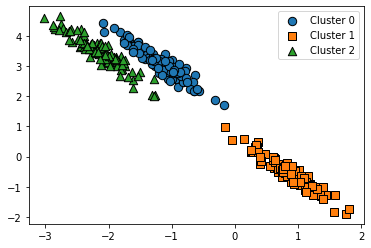

In [42]:
from sklearn.datasets import make_blobs

# make_blobs로 300개 데이터 세트, 3개 군집 세트, cluster_std=0.5를 만듦.
X,y = make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)

# 길게 늘어난 타원형 데이터 세트를 생성하기 위해 변환함
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85283229]]
X_ansio = np.dot(X,transformation)

# feature 데이터 세트와 make_blob의 y 결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_ansio,columns=['ftr1','ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

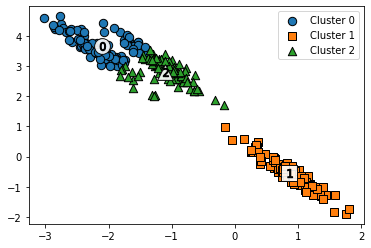

In [43]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3,random_state=0)
kmeans_label = kmeans.fit_predict(X_ansio)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

* KMeans로 군집화를 수행할 경우 주로 원형 영역 위치로 개별 군집화가 되며 최적의 군집화 어려움.

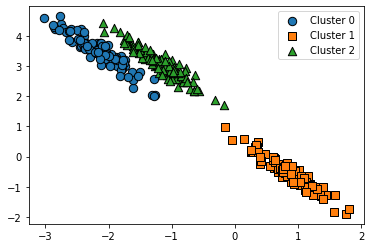

In [44]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3,random_state=0)
gmm_label = gmm.fit(X_ansio).predict(X_ansio)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정.
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

* 정확하게 군집화됨.

In [45]:
# 군집화 효율 차이 확인.
print('#### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

print('\n#### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

#### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

#### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


## **05 DBSCAN**

### **DBSCAN 개요**

* 밀도 기반 군집화의 대표적인 알고리즘. DBSCAN(Density Based Spatial Clustering of Applications with Noise)
* 복잡한 기하학적 분포도를 가진 데이터 세트에 유용.

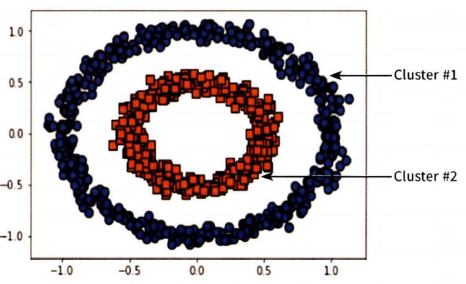

* 가장 중요한 두가지 파라미터:
1. 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 영역.
2. 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수.

입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의
* 핵심 포인트(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라 함
* 이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터를 이웃 포인트라 함.
* 경계 포인트(border point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만, 핵심 포인트를 이웃 포인트로 가지는 데이터
* 잠음 포인트(noise point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않고, 핵심 포인트도 이웃 포인트로 가지지 않은 데이터

1. 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로(자기 자신의 데이터 포함) 가정했을 때,

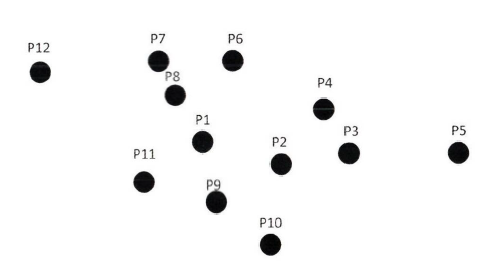

2. P1 데이터 기준 입실론 반경 내에 포함된 데이터가 7개로 최소 데이터 6개 이상을 만족하므로 P1 데이터는 핵심 포인트(Core Point).

3. P2 역시 반경 내에 6개의 데이터를 가지므로 핵심 포인트.

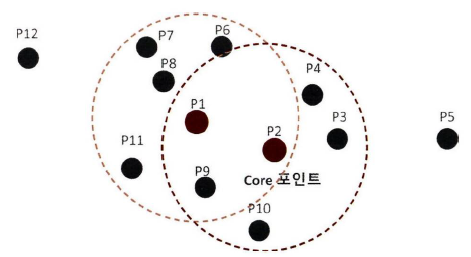

4. 핵심 포인트 P1의 이웃 데이터 포인트 P2 역시 핵심 포인트일 경우 P1에서 P2로 연결해 직접 접근 가능.

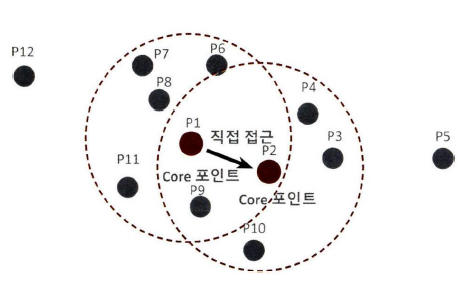

5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성. 이런 식으로 점차적으로 군집(Cluster) 영역을 확장해 나가는 것이 DBSCAN 군집화 방식.

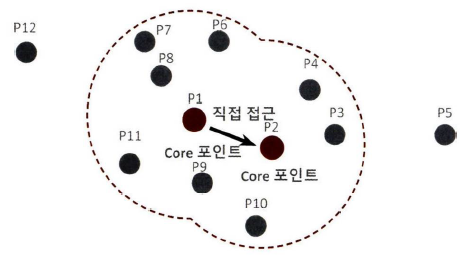

6. P3 데이터는 반경 내에 포함되는 이웃 데이터가 2개이므로 핵심 포인트가 되지 못함. 하지만 이웃 데이터 중에 핵심 포인트인 P2 존재. 자신은 핵심 포인트가 아니지만, 이웃 데이터로 핵심 포인트를 가지고 있는 데이터를 경계 포인트(Border Point)라 하고, 경계 포인트는 군집의 외곽 형성함.

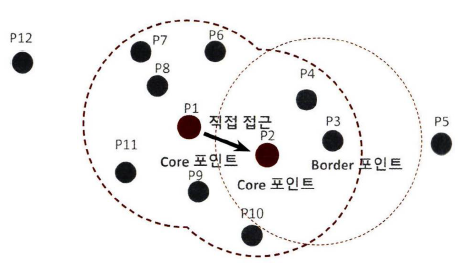

7. P5와 같이 반경 내에 최소 데이터를 가지고 있지도 않고, 핵심 포인트 또한 이웃 데이터로 가지고 있지 않는 데이터를 잡음포인트(Noise Point)라 함.

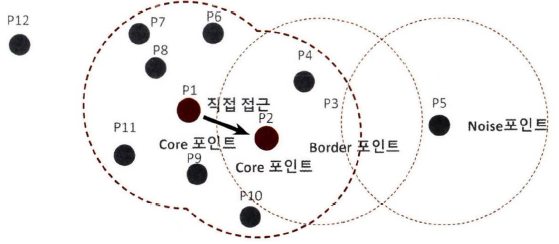

### **DBSCAN 적용하기 - 붓꽃 데이터 세트**

In [46]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns = feature_names)
irisDF['target'] = iris.target

In [47]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


* dbscan_cluster 값 중 -1은 노이즈에 속하는 군집 의미.

---


* DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환 후 시각화하기.

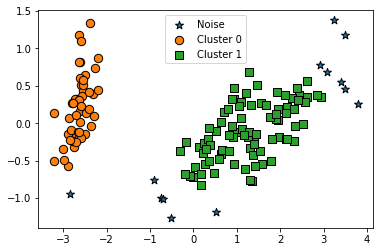

In [48]:
#2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

#visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

* 별표로 표현된 값은 모두 노이즈.
* eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아져 노이즈 데이터 개수 작아짐.
* min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 됨.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


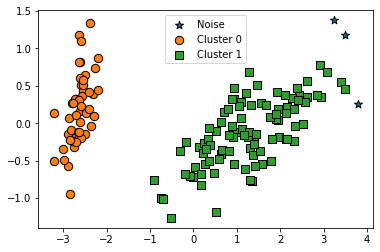

In [49]:
# eps를 증가시키면 줄어드는 노이즈 데이터 수 확인.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

* 노이즈 군집인 -1이 3개밖에 없음.

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


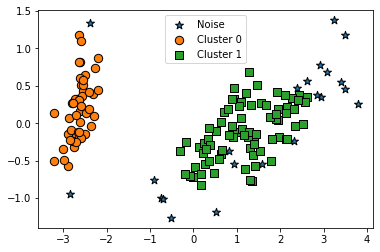

In [51]:
# min_samples를 늘리면 증가하는 노이즈 데이터 확인.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### **DBSCAN 적용하기 - make_circles() 데이터 세트**

* 복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘 비교해보기
* make_circles() 함수를 이용해 내부 원과 외부 원 형태로 돼있는 2차원 데이터 세트 생성하기.

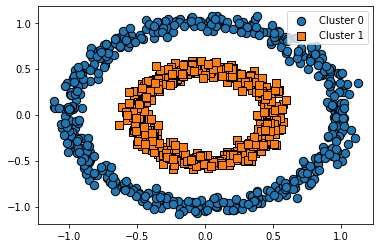

In [52]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

* make_circles()는 내부 원과 외부 원으로 구분되는 데이터 세트를 생성함을 확인 가능.

* K-평균과 GMM의 군집화 결과 확인하기.

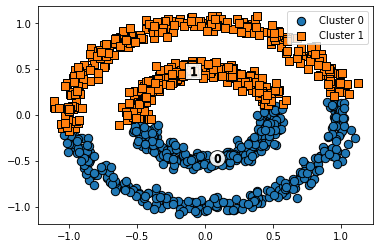

In [53]:
#KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_label = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

* 위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화됨.
* 거리 기반 군집화로는 위와같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움.

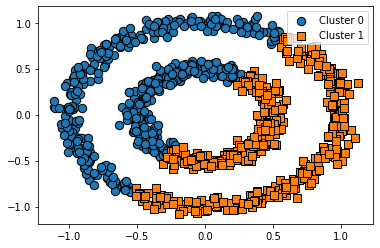

In [54]:
#GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit_predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

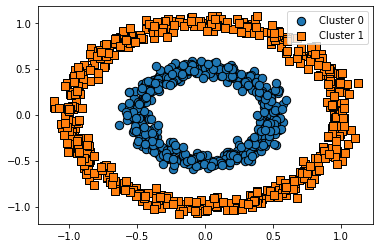

In [55]:
#DBSCAM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_label = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_label

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)